# Introduction

## Penjelasan Data

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan "yes" (ya) atau "no" (tidak) berlangganan.

## Penjelasan Atribut

Daftar Atribut Kategorikal: <br>
1. job <br>
("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
2. marital <br>
("divorced","married","single","unknown") <br>
note: "divorced" means divorced or widowed
3. education <br>
("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
4. default <br>
("no","yes","unknown")
5. housing <br>
("no","yes","unknown")
6. loan <br>
("no","yes","unknown")
7. contact <br>
("cellular","telephone")
9. month <br>
("jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week <br>
("mon","tue","wed","thu","fri")
11. poutcome <br>
("failure","nonexistent","success")
12. y (target) <br>
("yes","no")

Daftar Atribut Numerikal: <br>
1. Age <br>
2. duration (in seconds) <br>
3. campaign <br>
4. pdays <br>
(999 means client was not previously contacted)
5. previous <br>
6. emp.var.rate <br>
7. cons.price.idx <br>
8. cons.conf.idx <br>
9. euribor3m <br>
10. nr.eployed <br>

# Install and Import Required Libraries

In [2]:
# Data processing
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# features analysis libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

%matplotlib inline

# Data Loading

## Bank Additional

In [5]:
bank_df = pd.read_excel('./Dataset/bank-additional/bank-additional-full.xlsx')
test_bank_df = pd.read_excel('./Dataset/bank-additional/bank-additional.xlsx')

In [6]:
# Menampilkan 5 data teratas
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


# Bank Additional Descriptions

## Mengetahui dimensi dataset

In [7]:
print("Dimensi data = ", bank_df.shape)

Dimensi data =  (41188, 21)


## Mengetahui daftar atribut/fitur dari dataset

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**ANALISIS** <br>
Terlihat bahwa tidak ada missing values pada data. Hal ini cukup aneh. Missing values akan diperiksa lebih lanjut. <br>
Daftar Atribut Kategorikal: <br>
1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
9. month
10. day_of_week
11. poutcome
12. y (target) <br>

Daftar Atribut Numerikal: <br>
1. Age
2. duration (in seconds)
3. campaign
4. pdays
5. previous
6. emp.var.rate
7. cons.price.idx
8. cons.conf.idx
9. euribor3m
10. nr.eployed

## Mengelompokkan atribut berdasarkan tipe datanya

In [9]:
numerical_columns = list(bank_df.select_dtypes(include=['int64']).columns.values) + list(bank_df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(bank_df.select_dtypes(include=['object']))

In [10]:
# cetak variabel yang numerik
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'nr.employed',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

In [11]:
# cetak variabel yang kategorikal
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

Terlihat bahwa tipe data pada dataset sudah sesuai dengan apa yang seharusnya

## Deskriptif Statistik untuk atribut numerikal

In [12]:
# deskriptif statistik untuk data latih
bank_df[numerical_columns].describe()

,age,duration,campaign,pdays,previous,nr.employed,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,5167.019010,0.081886,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.494901,72.178074,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,0.000000,4964.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,5099.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,5191.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,5228.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,5228.000000,1.400000,94.767000,-26.900000,5.045000


## Mengetahui jumlah data untuk masing-masing kelas

In [13]:
bank_df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


Data latih memiliki: <br>
1. 36548 label "no"
2. 4640 label "yes" <br>

# Data Cleaning

## Memastikan tidak ada *missing values* pada Kolom Kategorikal
***
Pada keterangan dataset yang dilampirkan, missing values pada data ditandai dengan label "unknown" pada beberapa kolom dengan tipe kategorikal. Oleh karena, kolom kategorikal yang memuat label "unknown" akan diganti menjadi **nan** untuk menandai adanya missing values (unstandard missing values)

In [14]:
# Mengetahui jumlah "unknown" di setiap atribut
bank_df[
    bank_df[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

**default, education, housing, loan, job, marital** menjadi kolom kategorikal yang banyak mengandung missing values

## Mengganti "unknown" dengan Numpy nan

In [15]:
# Mengganti "unknown" pada data latih
bank_df[
    bank_df[categorical_columns]=="unknown"
] = np.nan

### Cek apakah "unknown" sudah terganti dengan Numpy nan dengan benar

In [16]:
# Mengetahui jumlah "unknown" di setiap atribut
bank_df[
    bank_df[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

Label "unknown" sudah tergantikan dengan Numpy nan semuanya

## Melihat *unstandard missing values* pada kolom kategorikal

In [17]:
bank_df[
    categorical_columns
].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [18]:
# Mencetak semua nilai unik pada masing-masing kolom kategori
for cat_col in categorical_columns:
    print("Nilai unik untuk kolom ", cat_col.upper())
    print(bank_df[cat_col].unique())
    print('='*30)

Nilai unik untuk kolom  JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Nilai unik untuk kolom  MARITAL
['married' 'single' 'divorced' nan]
Nilai unik untuk kolom  EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Nilai unik untuk kolom  DEFAULT
['no' nan 'yes']
Nilai unik untuk kolom  HOUSING
['no' 'yes' nan]
Nilai unik untuk kolom  LOAN
['no' 'yes' nan]
Nilai unik untuk kolom  CONTACT
['telephone' 'cellular']
Nilai unik untuk kolom  MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Nilai unik untuk kolom  DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
Nilai unik untuk kolom  POUTCOME
['nonexistent' 'failure' 'success']
Nilai unik untuk kolom  Y
['no' 'yes']


Semua nilai di masing-masing atribut sudah sesuai dengan apa yang tertera dari deskripsi dataset yang diterima. Sehingga tidak ada **invalid values** pada kolom kategorikal. <br>
Pada kelas target **y** juga hanya terdapat dua nilai unik yaitu **no** dan **yes** dan tidak terdapat **missing values**, sehingga **tidak diperlukan *dropping data*** karena ada kelas target yang missing values

## Melihat *unstandard missing values* pada kolom numerikal

In [19]:
bank_df[
    numerical_columns
].head()

,age,duration,campaign,pdays,previous,nr.employed,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,0,5191,1.1,93.994,-36.4,4.857
1,57,149,1,999,0,5191,1.1,93.994,-36.4,4.857
2,37,226,1,999,0,5191,1.1,93.994,-36.4,4.857
3,40,151,1,999,0,5191,1.1,93.994,-36.4,4.857
4,56,307,1,999,0,5191,1.1,93.994,-36.4,4.857


Terlihat bahwa atribut **pdays** ada nilai **999** yang menandakan klien sebelumnya tidak dihubungi. Ini bisa diganti dengan nilai **0**. Akan diperiksa juga nilai-nilai yang "aneh" untuk atribut numerikal lainnya

In [20]:
# Mencetak semua nilai unik pada setiap atribut numerikal
for num_col in numerical_columns:
    print("Nilai unik untuk kolom ", num_col.upper())
    print(bank_df[num_col].unique())
    print('='*30)

Nilai unik untuk kolom  AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik untuk kolom  DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik untuk kolom  CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik untuk kolom  PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Nilai unik untuk kolom  PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik untuk kolom  NR.EMPLOYED
[5191 5228 5196 5176 5099 5076 5018 5024 5009 4992 4964]
Nilai unik untuk kolom  EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik untuk kolom  CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

Semua nilai yang ada untuk setiap kolom numerik tidak ada keanehan dengan nilai-nilai yang lainnya. Hanya **pdays** yang memiliki nilai yang aneh yaitu **999**, sehingga nilai ini akan diganti menjadi **0** (sesuai deskripsi dataset yang diterima)

In [21]:
# mengganti nilai 999 pada pdays 
bank_df['pdays'].replace(999,0,inplace=True)

## Merangkum total missing values (nan) values

In [22]:
# missing values pada data train
print("Jumlah nan missing values atribut kategori = ",bank_df[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values atribut numerikal = ",bank_df[numerical_columns].isnull().sum().sum())

Jumlah nan missing values atribut kategori =  12718
Jumlah nan missing values atribut numerikal =  0


Hanya data kategorikal yang mengandung missing values dan data numerikal tidak mengandung missing values. Akan dilakukan strageti penanganan missing values untuk data kategorikal

## Penanganan Missing Values
***
Untuk data kategorikal, *missing values* akan diisi dengan modus dari atribut X, sedangkan untuk data numerikal *missing values* akan diisi dengan median dari atribut Z.

### Pisahkan data yang bertipe kategorik dan numerik

In [23]:
# categorical data
bank_df_categorical = bank_df[categorical_columns]

# numerical data
bank_df_numerical = bank_df[numerical_columns]

### Instansiasi kelas Imputer untuk filling nan pada atribut kategorikal

In [24]:
# instansiasi kelas SimpleImputer untuk imputer atribut kategorikal
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

### Fit data training categorical into imputer, transform into training and testing categorical

In [25]:
# fit dengan data training
imputer_categorical.fit(bank_df_categorical)

SimpleImputer(strategy='most_frequent')

In [26]:
# transform ke data latih
bank_df_categorical = imputer_categorical.transform(bank_df_categorical)

### Buat numpy array hasil imputer transform ke dalam dataframe

In [27]:
# buat hasil array ke dalam dataframe
bank_df_categorical = pd.DataFrame(bank_df_categorical,columns=categorical_columns)

### Concate categorical columns dengan numerical columns

In [28]:
bank_df = pd.concat([bank_df_numerical,bank_df_categorical],axis=1)

### Check kalau masih ada missing values terlewat

In [29]:
# missing values pada data train
print("Jumlah nan missing values atribut kategori = ",bank_df[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values atribut numerikal = ",bank_df[numerical_columns].isnull().sum().sum())

Jumlah nan missing values atribut kategori =  0
Jumlah nan missing values atribut numerikal =  0


Setelah dilakukan imputasi, **tidak ada missing values** yang tersisa

### Rename nama atribut pada data

In [30]:
bank_df.rename(columns={
    'job':'pekerjaan',
    'marital':'pernikahan',
    'education':'pendidikan',
    'default':'kredit_default',
    'housing':'pinjaman_rumah',
    'loan':'pinjaman_pribadi',
    'contact':'alat_komunikasi',
    'month':'kontak_terakhir_bulan',
    'day_of_week':'kontak_terakhir_hari',
    'poutcome':'luaran_marketing_sebelumnya',
    'y':'berlangganan_deposito',
    'age':'umur',
    'duration':'kontak_terakhir_berdurasi',
    'campaign':'jumlah_kontak_selama_pemasaran',
    'pdays':'jumlah_hari_berlalu',
    'previous':'jumlah_kontak_sebelum_pemasaran',
    'emp.var.rate':'tingkat_variasi_pekerjaan',
    'cons.price.idx':'indeks_harga_konsumen',
    'cons.conf.idx':'indeks_kepercayaan_konsumen',
    'euribor3m':'tarif_euribor_3bulan',
    'nr.employed':'jumlah_karyawan',
},inplace=True)

### Menampilkan 5 data teratas setelah imputasi missing values pada categorical columns

In [31]:
bank_df.head()

,umur,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_hari_berlalu,jumlah_kontak_sebelum_pemasaran,jumlah_karyawan,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,...,pernikahan,pendidikan,kredit_default,pinjaman_rumah,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,kontak_terakhir_hari,luaran_marketing_sebelumnya,berlangganan_deposito
0,56,261,1,0,0,5191,1.1,93.994,-36.4,4.857,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,5191,1.1,93.994,-36.4,4.857,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,5191,1.1,93.994,-36.4,4.857,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,5191,1.1,93.994,-36.4,4.857,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,5191,1.1,93.994,-36.4,4.857,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


# Eksplorasi Data (Visualisasi)

## Berapa persentase setiap nilai pada kelas target?

In [32]:
bank_df['berlangganan_deposito'].value_counts()

no     36548
yes     4640
Name: berlangganan_deposito, dtype: int64

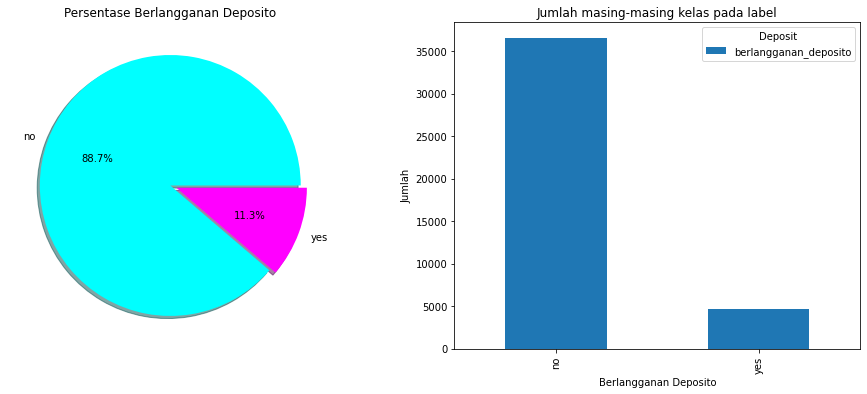

In [33]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "berlangganan deposito"
bank_df['berlangganan_deposito'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='cool',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Berlangganan Deposito')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
bank_df.groupby('berlangganan_deposito').agg({'berlangganan_deposito':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Jumlah masing-masing kelas pada label')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Berlangganan Deposito')
ax[1].legend(title='Deposit')

Terlihat bahwa dari data yang diperoleh, ada ketidakseimbangan proporsi dari setiap nilai pada label kelas. Hal ini mungkin akan berpengaruh kepada hasil *recall* klasifikasi yang rendah. Undersampling bisa jadi opsi ketika performa model klasifikasi tidak cukup bagus untuk mengenali kelas 'yes' <br>
Nilai **yes** bahkan **7x lebih sedikit** dibandingkan nilai **no**.

## Bagaimana kecenderungan berlangganan deposit dilihat dari status pernikahan?

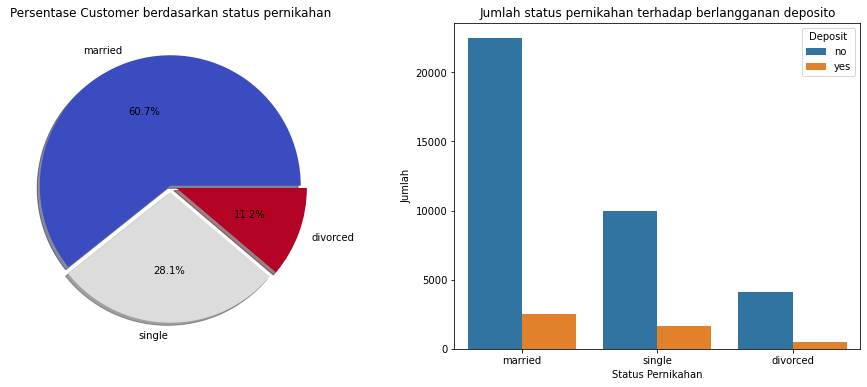

In [34]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "marital"
bank_df['pernikahan'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.05,0.05], 
    cmap='coolwarm',
    shadow=True,
)
ax[0].set_title('Persentase Customer berdasarkan status pernikahan')
ax[0].set_ylabel('')

# Barchart besaran setiap status pernikahan terhadap setiap kelas target
sns.countplot(
    x='pernikahan',
    hue='berlangganan_deposito',
    data=bank_df
)
ax[1].set_title('Jumlah status pernikahan terhadap berlangganan deposito')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Status Pernikahan')
ax[1].legend(title='Deposit')

Data didominasi oleh status pernikahan "married". Status pernikahan ini memberikan jumlah berlangganan deposit untuk kelas 'No' dan 'Yes' tertinggi dibanding 2 status pernikahan lainnya.

# Preprocessing Datasets sebelum Modelling

## Encoding Variabel Kategorik 
***
Atribut yang bertipe kategorikan akan dipisahkan menjadi tipe ordinal dan nominal. Tipe ordinal adalah ada tingkatan diantara nilainya, sedangkan pada tipe nominal tidak terdapat tingkatan diantara nilainya dan semua nilai dianggap setara. <br>
Berikut ini adalah 12 atribut dengan tipe kategorikal: <br>
1. job <br>
("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
2. marital <br>
("divorced","married","single","unknown") <br>
note: "divorced" means divorced or widowed
3. education <br>
("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
4. default <br>
("no","yes","unknown")
5. housing <br>
("no","yes","unknown")
6. loan <br>
("no","yes","unknown")
7. contact <br>
("cellular","telephone")
9. month <br>
("jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week <br>
("mon","tue","wed","thu","fri")
11. poutcome <br>
("failure","nonexistent","success")
12. y (target) <br>
("yes","no")

Dari sini akan dibagi menjadi: <br>
**Nominal Atribut** : (job, education, contact, month, day_of_week, poutcome) <br>
**Ordinal Atribut** : (marital, default, housing, loan, y) <br>

Atribut bertipe **nominal** akan dilakukan one-hot encoding, sedangkan atribut bertipe **ordinal** akan dilakukan label encoding

### Mengelompokkan atribut berdasarkan tipe datanya

In [35]:
numerical_columns = list(bank_df.select_dtypes(include=['int64']).columns.values) + list(bank_df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(bank_df.select_dtypes(include=['object']))

In [36]:
# memilih atribut nominal dari atribut kategori
nominal_columns = ['pekerjaan', 'pendidikan', 'alat_komunikasi', 'kontak_terakhir_bulan', 'kontak_terakhir_hari', 'luaran_marketing_sebelumnya']
ordinal_columns = [col for col in categorical_columns if col not in nominal_columns]

### One Hot Encoding untuk Nominal Atribut

In [37]:
# one hot encoding pada data untuk nominal columns
ohe_bank_df = pd.get_dummies(bank_df[nominal_columns], columns=nominal_columns, prefix=nominal_columns)

### Label Enconding untuk ordinal atribut

In [38]:
le_bank_df = bank_df.loc[:,ordinal_columns]
# instansiasi kelas LabelEncoder
encoder = LabelEncoder()

In [39]:
# label encoding
for ord_col in ordinal_columns:
    le_bank_df[ord_col] = encoder.fit_transform(le_bank_df[ord_col])

### Concatination data hasil one hot encoding dan label encoding menjadi 1 dataframe

In [40]:
bank_df_categorical_encoded = pd.concat([ohe_bank_df,le_bank_df],axis=1)

### Menampilkan 5 data teratas hasil encoding

In [41]:
# 5 data teratas 
bank_df_categorical_encoded.head()

,pekerjaan_admin.,pekerjaan_blue-collar,pekerjaan_entrepreneur,pekerjaan_housemaid,pekerjaan_management,pekerjaan_retired,pekerjaan_self-employed,pekerjaan_services,pekerjaan_student,pekerjaan_technician,...,kontak_terakhir_hari_tue,kontak_terakhir_hari_wed,luaran_marketing_sebelumnya_failure,luaran_marketing_sebelumnya_nonexistent,luaran_marketing_sebelumnya_success,pernikahan,kredit_default,pinjaman_rumah,pinjaman_pribadi,berlangganan_deposito
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


## Mengukur pengaruh atribut pada kelas target

### Pengaruh atribut kategorikal pada kelas target
***
Pengaruh atribut/fitur bertipe **kategorikal** dapat diukur dengan **Chi-Squared**

In [42]:
# mendapatkan daftar kolom baru hasil encoding
ec_categorical_columns = list(bank_df_categorical_encoded.columns)
ec_categorical_columns.remove('berlangganan_deposito')

# Menyiapkan atribute dan target
X_categorical = bank_df_categorical_encoded.drop('berlangganan_deposito',axis=1)
y_categorical = bank_df_categorical_encoded['berlangganan_deposito']

In [43]:
# instansiasi kelas untuk Chi-Squared
chi_square_fs = SelectKBest(score_func=chi2,k='all')

# fit chi-square into data
X_categorical_selected = chi_square_fs.fit_transform(X_categorical,y_categorical)

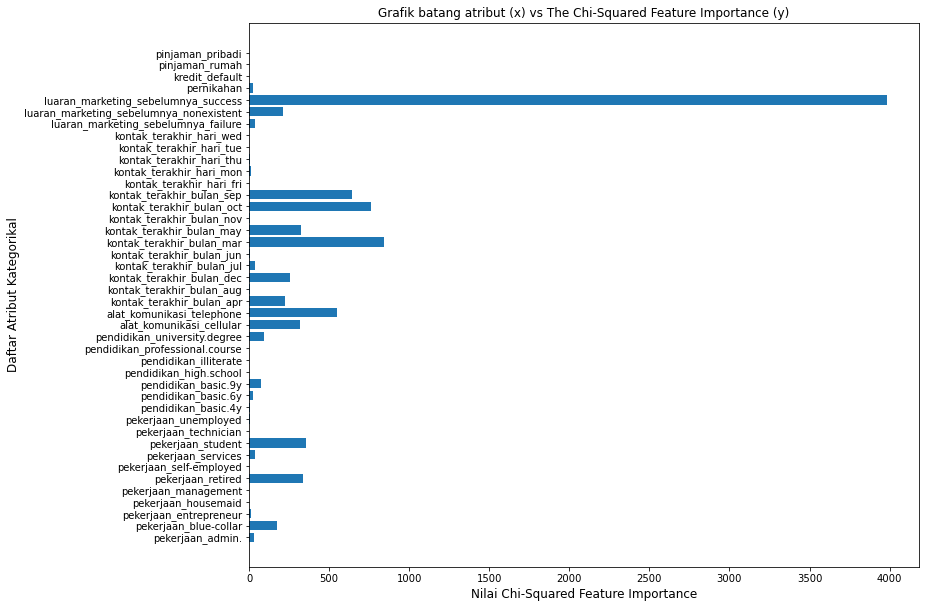

In [44]:
# Plotting score setiap atribut kategorikal
plt.figure(figsize=(12,10))
plt.barh([cat_col for cat_col in ec_categorical_columns], chi_square_fs.scores_)
plt.ylabel('Daftar Atribut Kategorikal', fontsize=12)
plt.xlabel('Nilai Chi-Squared Feature Importance', fontsize=12)
plt.title('Grafik batang atribut (x) vs The Chi-Squared Feature Importance (y)',fontsize=12)
plt.show()

Atribut **luaran_marketing_sebelumnya_success** menjadi atribut kategorikal yang memberikan kepentingan atribut tertinggi dibandingkan dengan yang lainnya. Bahkan rentang nilainya cukup jauh dibandingkan dengan atribut yang lainnya.

### Pengaruh atribut numerikal pada kelas target
***
Kepentingan atribut numerik terhadap label kelas kategorikal bisa diukur dengan ANOVA F-score

In [45]:
# menyiapkan atribut dan target
X_numerical = bank_df[numerical_columns].copy(deep=True)
y_numerical = y_categorical.copy(deep=True)

In [46]:
# instansiasi kelas anova
anova_fs = SelectKBest(score_func=f_classif,k='all')

# fit into data
X_numerical_selected = anova_fs.fit_transform(X_numerical,y_numerical)

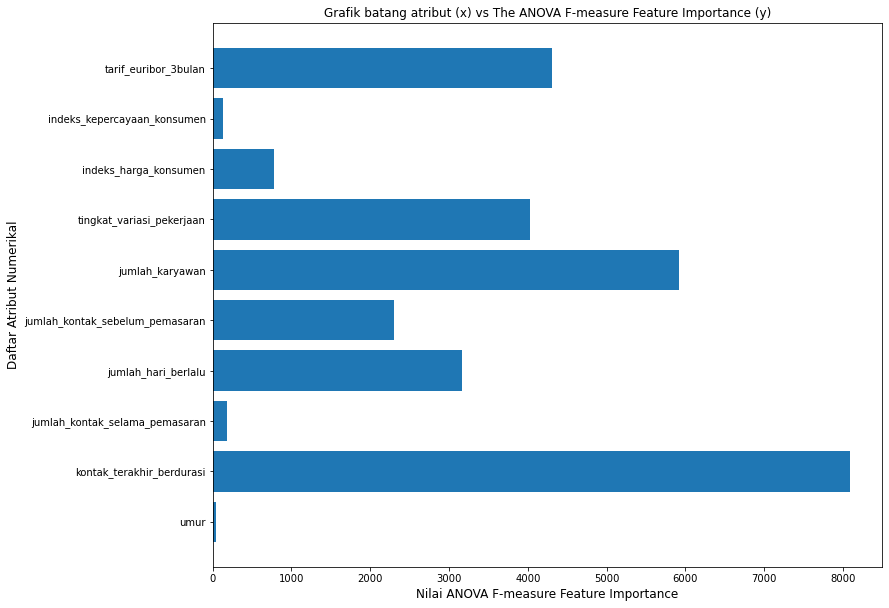

In [47]:
# Plotting score setiap atribut kategorikal
plt.figure(figsize=(12,10))
plt.barh([num_col for num_col in list(X_numerical.columns)], anova_fs.scores_)
plt.ylabel('Daftar Atribut Numerikal', fontsize=12)
plt.xlabel('Nilai ANOVA F-measure Feature Importance', fontsize=12)
plt.title('Grafik batang atribut (x) vs The ANOVA F-measure Feature Importance (y)',fontsize=12)
plt.show()

Atribut **kontak_terakhir_berdurasi** memiliki kepentingan atribut yang paling tinggi dibandingkan atribut numerikal lainnya. Hal ini masuk akal karena keberhasilan *customer* berlangganan deposito ditentukan berapa lama durasi pemasaran/kampanye yang dilakukan pihak bank melalui telepon

## Menyatukan data bertipe numerikal dan data bertipe kategorikal hasil encoding

In [48]:
bank_df = pd.concat([bank_df[numerical_columns],bank_df_categorical_encoded],axis=1)

## Pembagian dataset ke dalam data latih dan data uji
***
Dataset akan dibagi ke dalam **80% data latih** dan **20% data uji**. <br>
1. Data latih akan digunakan untuk proses tuning parameter dan hyperparameter serta melakukan feature selection
2. Data latih akan digunakan untuk melatih model setelah mendapatkan hyperparameter terbaik dengan fitur terbaik  hasil seleksi
3. Data uji digunakan untuk menguji performa model klasifikasi yang sudah dilatih

### Pisahkan attributes sebagai X dan target sebagai y

In [49]:
X = bank_df.drop('berlangganan_deposito',axis=1)
y = bank_df['berlangganan_deposito']

### Train test split (80 train : 20 test)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Mengetahui dimensi data train dan data test

In [51]:
print("Dimensi atribut data latih = ", X_train.shape)
print("Dimensi target data latih = ", y_train.shape)
print("Dimensi atribut data uji = ", X_test.shape)
print("Dimensi target data uji = ", y_test.shape)

Dimensi atribut data latih =  (32950, 52)
Dimensi target data latih =  (32950,)
Dimensi atribut data uji =  (8238, 52)
Dimensi target data uji =  (8238,)


## Normalisasi Data
***
Metode Normalisasi *z-score* digunakan untuk menyamakan skala dari setiap atribut pada data ke standard normal distribution (mean=0, std=1)

In [52]:
# instansiasi kelas StandardScaler
standard_scaler = StandardScaler()

# fit scaler into train data
standard_scaler.fit(X_train)

# transform data with scaler
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

## Dimensionality Reduction
***
Jumlah dimensi akan dikurangi dengan PCA

### Menerapkan PCA pada data latih

In [53]:
# instansiasi objek PCA
pca_ = PCA()

# fit into training data
pca_.fit(X_train)

# mencetak nilai eigen setiap principal component
print('Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_)
print("="*30)

# mencetak ratio masing-masing nilai eigen terhadap keseluruhan
print('Rasio Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_ratio_)
print("="*30)

Nilai Eigen setiap Principal Component
[5.74715253e+00 2.71510082e+00 2.32584675e+00 2.09435588e+00
 1.89681260e+00 1.78991546e+00 1.66079754e+00 1.58937485e+00
 1.54491348e+00 1.28673666e+00 1.27051123e+00 1.25381520e+00
 1.22916509e+00 1.20804316e+00 1.19303497e+00 1.14804225e+00
 1.10930057e+00 1.09732622e+00 1.06241706e+00 1.05708301e+00
 1.04154047e+00 1.03330793e+00 1.02690794e+00 1.02329725e+00
 1.00737254e+00 1.00162104e+00 9.89606324e-01 9.86620020e-01
 9.71787254e-01 9.53014399e-01 9.36042929e-01 8.82715763e-01
 8.54224586e-01 7.91167280e-01 7.33460454e-01 7.13307261e-01
 6.11026143e-01 4.47316342e-01 4.29103107e-01 4.13295570e-01
 2.84697693e-01 2.39346939e-01 2.22778358e-01 1.22254888e-01
 3.93745080e-03 2.08293790e-03 1.13342599e-30 2.83787648e-31
 2.40026339e-31 8.63289968e-32 3.77142680e-32 2.32748923e-33]
Rasio Nilai Eigen setiap Principal Component
[1.10518810e-01 5.22118926e-02 4.47264646e-02 4.02748523e-02
 3.64760584e-02 3.44204064e-02 3.19374449e-02 3.05639733e-02


### Plotting Ratio Nilai Eigen yang dihasilkan PCA terhadap data latih

In [54]:
# membuat dataframe untuk memplotting variance ratio yang dihasilkan PCA
pca_variance = pd.DataFrame(data=pca_.explained_variance_ratio_,columns=['PC Variance'])
pca_variance['pc_name'] = pd.Series(data=['PC-'+str(i+1) for i in range(0,X_train.shape[1])])
pca_variance = pca_variance.sort_values(by='PC Variance')

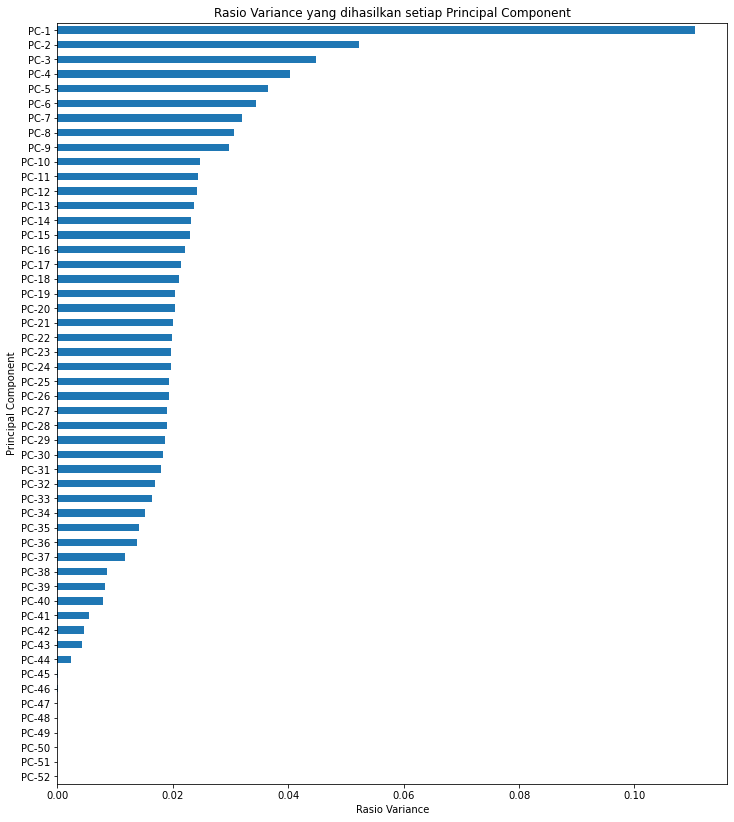

In [55]:
# Plotting variance ratio yang dijelaskan setiap component
plt.figure(figsize=(12,14))
pca_variance['PC Variance'].plot(kind='barh')
plt.yticks(ticks=range(0,X_train.shape[1]), labels=pca_variance['pc_name'])
plt.title('Rasio Variance yang dihasilkan setiap Principal Component')
plt.xlabel('Rasio Variance')
plt.ylabel('Principal Component')
plt.show()

### Mencari jumlah principal component terbaik
***
Ada beberapa metode untuk menentukan jumlah principal component terbaik yang harus digunakan. Salah satu sumber menyebutkan: <br>
1. Jumlah PC terbaik yang terpilih adalah PC yang menghasilkan nilai eigen lebih besar atau sama dengan 1

In [56]:
# Mencari jumlah n_component yang menghasilkan nilai eigen value >= 1
def find_best_n_components(pca):
    """
        Deskripsi Fungsi:
        - Fungsi untuk mencari jumlah principal component terbaik dari hasil PCA pada data latih 
        dengan syarat nilai eigen PC >= 1
        
        Parameter Fungsi:
        -pca : model pca yang sudah difitting pada data latih
        
        Return Fungsi:
        -n_best_component: jumlah principal component terbaik yang memenuhi syarat
        
    """
    
    n_best_component = 0
    for i in range(0,len(pca.explained_variance_)):
        if pca.explained_variance_[i]>=1:
            n_best_component+=1
    
    return n_best_component

In [57]:
# mencari jumlah principal component terbaik
n_components = find_best_n_components(pca_)
print('Jumlah n Principal Component terbaik = {} komponen'.format(n_components))
print('Informasi yang dijelaskan oleh {} komponen = {} %'.format(n_components,(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))
print('Kehilangan Informasi = {} %'.format(100-(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))

Jumlah n Principal Component terbaik = 26 komponen
Informasi yang dijelaskan oleh 26 komponen = 77.71647303428311 %
Kehilangan Informasi = 22.283526965716888 %


### Instansiasi PCA dengan n component terbaik
***
1. Buat PCA dengan n component terbaik
2. Fitting ke data latih 
3. Transform ke atribut data latih dan data uji

In [58]:
# instansiasi objek PCA
pca_ = PCA(n_components=n_components)

# fit into training data
pca_.fit(X_train)

# transform into train and test data
X_train_pca = pca_.transform(X_train)
X_test_pca = pca_.transform(X_test)

### Buat DataFrame hasil perhitungan PCA

In [59]:
# buat dataframe untuk mempermudah melihat data hasil PCA
train_pca_df = pd.DataFrame(data=X_train_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
train_pca_df['target'] = y_train.to_numpy()

test_pca_df = pd.DataFrame(data=X_test_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
test_pca_df['target'] = y_test.to_numpy()

# Data yang siap dimodelkan

## Data Latih

### Atribut

In [60]:
train_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,target
0,-2.429701,1.091011,-1.418257,0.861760,1.646166,-0.306587,-1.347873,0.752827,-0.245521,0.777171,...,-0.222843,-0.457519,0.337269,-0.318818,-0.257295,0.129479,-0.082151,-0.132516,-0.219709,0
1,1.790182,-0.719716,-0.934953,-1.524774,-1.750303,-1.114315,-0.524720,0.074822,-0.683796,0.754627,...,0.649941,-0.126141,0.351729,0.815570,-0.607782,0.558468,0.324807,-0.018550,0.014682,0
2,4.003221,1.844462,-0.363683,3.646606,-0.142021,-1.147875,1.527761,-2.374879,0.143690,1.702431,...,-0.988019,-0.008335,0.509143,0.569467,-1.029417,0.043373,0.490761,-0.082013,1.262494,0
3,-1.589373,-0.940308,-0.950264,2.349731,2.028378,-0.906828,0.381105,0.510291,0.284107,-0.653091,...,1.952903,0.756213,0.570834,0.006733,0.513447,0.767953,0.598490,0.006606,-2.913691,0
4,-1.776618,1.183969,0.622416,-2.095611,-0.707098,-0.189961,1.100034,0.732194,0.558477,-0.127611,...,0.759345,-0.475294,-0.098003,0.054699,-0.867537,0.195961,-0.054291,-0.334544,0.969965,0


### Target

In [61]:
y_train.head()

12556    0
35451    0
30592    0
17914    0
3315     0
Name: berlangganan_deposito, dtype: int32

## Data Uji

### Atribut

In [62]:
test_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,target
0,4.001286,1.012374,-0.727793,0.099228,0.582941,1.300691,1.460564,-2.608468,0.853246,0.897977,...,0.060522,-0.731374,-0.334792,-1.031180,0.170064,-0.505059,-0.620072,0.279323,0.616590,0
1,-1.712762,0.626919,1.459010,-0.626604,-1.628232,-1.183071,-0.402783,-0.314366,0.197033,-0.475049,...,0.734912,-0.070810,0.346517,-0.155347,-0.034906,-0.063208,-0.212061,-0.219698,0.307692,0
2,3.776643,2.295552,-2.389843,0.384811,0.741285,0.495861,-1.638743,-1.136462,2.413419,1.991949,...,-0.308407,0.056838,-0.143008,-0.109169,-0.802897,0.473584,0.518038,-0.061053,0.230178,0
3,-2.708633,1.491565,0.999497,-1.955921,0.551227,-0.919946,1.146649,-0.844740,-0.980973,1.905492,...,0.369598,-0.301441,-0.288192,-0.000285,-0.435093,-0.086494,0.078597,-0.343131,0.569306,0
4,-1.330115,-1.203528,-0.824254,0.040506,2.083456,-0.599066,1.815881,0.535280,-0.107106,1.139349,...,2.338197,-0.273175,0.425017,0.176468,-0.049116,0.641610,-0.531546,-0.092695,-1.591394,0


### Target

In [63]:
y_test.head()

32884    0
3169     0
32206    0
9403     0
14020    0
Name: berlangganan_deposito, dtype: int32

# Modelling
***
Model klasifikasi *machine learning* yang digunakan pada tugas ini yaitu: <br>
1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree
5. Random Forest
6. Naive Bayes

***
**Recall** akan digunakan sebagai penilaian model karena pada permasalahan ini bertujuan untuk **meminimumkan *False Negative*** <br>
Confusion matrix: <br>
    &emsp;Predicted <br>
    &emsp;&emsp;0(No)   1(yes) <br>
0(No) <br>
1(yes) <br> <br>

**Alur** <br>
1. Setiap model akan dilihat performanya dengan akurasi untuk pertama kali. Semua model yang digunakan akan menggunakan *default* parameter pada masing-masing model.
2. Hasil akurasi setiap model akan dibandingkan dengan boxplot
3. Setiap model akan dituning dengan memilih metric recall
4. Model dengan rata-rata recall terbaik akan dipilih sebagai model terbaik.
5. Model terbaik tersebut akan dituning kembali dengan menerapkan undersampling pada dataset karena dataset memiliki kelas yang unbalanced

In [64]:
# Inisialisasi fold dan scoring yang digunakan
num_fold = 10
scoring_accuracy ='accuracy'
scoring_recall = 'recall'

In [65]:
# buat list dari seluruh model yang digunakan
models = []

# append model
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))

#k-fold cross validation initialization object
kfold = KFold(n_splits=num_fold, random_state=42, shuffle=True)

In [66]:
def perform_model(models,X_train,y_train,kfold, scoring='accuracy'):
    """
        Deskripsi Function:
        - Fungsi ini digunakan untuk melakukan model cross-validation dengan data latih yang ada. Setiap model
        akan divalidasi dengan ukuran skor (scoring) yang telah ditetapkan, semisal (akurasi, recall, etc).
        
        Function parameters:
        - models: list of tuples dari model yang ingin dituning (LogisticRegression, SVM, etc)
        - X_train: dataframe atau np.array dari atribut data latih yang sudah dipreprocessing
        - y_train: dataframe atau np.array dari target data latih yang sudah dipreprocessing
        - kfold: objek hasil instansiasi kelas KFold 
        - scoring: metode untuk memngukur performa model (accuracy, recall, precision, etc)
        
        Function returns:
        - cv_results: List dari hasil cross validation setiap model yang sudah dituning
        - model_names: List dari nama setiap model (string)
        - print_msg: List berupa pesan untuk menampilkan model dengan hasil performanya pada data validasi
    """
    cv_results = [] #menampung hasil crossvalidation setiap model
    model_names = [] #menampung nama model
    print_msg = [] #menampung pesan yang akan ditampilkan
    
    
    for model_name, model in models:
        #cross validation result
        cv_result = cross_val_score(model,X_train,y_train, cv=kfold,scoring=scoring)

        #append into list
        cv_results.append(cv_result)
        model_names.append(model_name)

        #print result
        msg_result = "{}: mean {} = {}  std {} = {}".format(model_name,scoring,cv_result.mean(),scoring,cv_result.std())
        print_msg.append(msg_result)
    
    return cv_results,model_names,print_msg

## Hitung mean dan std dari akurasi dari setiap model yang digunakan
***
Validasi yang digunakan adalah 10-fold cross-validation

In [67]:
cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_accuracy
)

In [68]:
# cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.9023975720789075  std accuracy = 0.005336941143460825
K-Nearest Neighbor: mean accuracy = 0.8957814871016693  std accuracy = 0.0038152947204413415
Support Vector Machine: mean accuracy = 0.90597875569044  std accuracy = 0.00412300035150026
Decision Tree: mean accuracy = 0.8766919575113808  std accuracy = 0.0046624027206576425
Random Forest: mean accuracy = 0.903247344461305  std accuracy = 0.005561078929794876
Naive Bayes: mean accuracy = 0.8823975720789073  std accuracy = 0.005381711103261861


## Bandingkan hasil akurasi setiap model

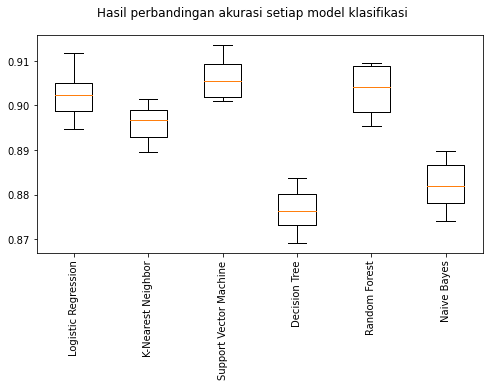

In [69]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

**ANALISIS** <br>
1. Dari segi **akurasi** Logistic Regression, SVM, dan Random Forest tampil menjadi model terbaik dengan rata-rata akurasi ketiga model ini yang hampir sama. 
2. Decision Tree dan Naive Bayes memberikan performa akurasi paling rendah

## Melihat confusion matrix dari SVM
***
Ukuran performa yang digunakan pada permasalahan ini adalah **memaksimalkan recall**

In [70]:
# inisialisasi model SVM dengan default parameter
svm = SVC()

# fit model into training data
svm.fit(X_train_pca,y_train)

# get y prediction
y_pred = svm.predict(X_test_pca)

In [71]:
# print results
print("SVM Recall score = ", metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

SVM Recall score =  0.32192513368983955
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.65      0.32      0.43       935

    accuracy                           0.90      8238
   macro avg       0.78      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238

[[7142  161]
 [ 634  301]]


**ANALISIS HASIL CONFUSION MATRIX SVM** <br>
Model SVM walaupun memberikan nilai rata-rata akurasi tertinggi, namun nyatanya masih belum maksimal dalam memberikan **recall** terbaik. Hal ini dibuktikan dengan nilai FN yang besar yaitu **629** dibandingkan TP yaitu **306**. <br> <br>
**Penting!!** <br>
Nilai FN dan TP mungkin bervariasi seiring kode program dijalankan dan komputer yang digunakan. Namun, saat dijalankan SVM muncul memberikan hasil seperti di atas

## Model Tuning dengan memilih metriks evaluasi yang benar
***
Recall akan digunakan untuk mentuning model yang digunakan 

In [72]:
cv_results_recall, model_names, print_msg_recall = perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_recall
)

In [73]:
# cetak hasil rata-rata recall setiap model
for msg in print_msg_recall:
    print(msg)

Logistic Regression: mean recall = 0.3192603331072764  std recall = 0.03079447423581431
K-Nearest Neighbor: mean recall = 0.31758463405713916  std recall = 0.028617696805422692
Support Vector Machine: mean recall = 0.32436271613197654  std recall = 0.018865836653459214
Decision Tree: mean recall = 0.45715525652911115  std recall = 0.029950265204466586
Random Forest: mean recall = 0.37549497336108606  std recall = 0.03566316332496404
Naive Bayes: mean recall = 0.413353981342763  std recall = 0.033393649474232484


### Bandingkan hasil recall setiap model

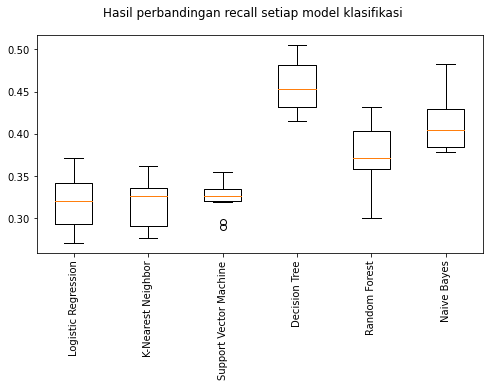

In [74]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan recall setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_recall)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

**ANALISIS** <br>
1. Decision Tree dan Naive Bayes tampil dengan rata-rata recall terbaik dibandingkan model-model lainnya.
2. Akurasi pada dataset yang imbalanced tidak bisa menjadi penentu untuk memilih model. Bisa dilihat bahwa SVM tidak mampu memberikan performa recall yang terbaik, padahal sebelumnya model ini memberikan akurasi tertinggi.

### Evaluasi model dengan recall terbaik menggunakan data testing

In [75]:
# inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# fit model into training data
dt.fit(X_train_pca,y_train)

# get y prediction
y_pred_dt = dt.predict(X_test_pca)

In [76]:
# print score
print("Accuracy score Decision Tree = ", metrics.accuracy_score(y_test,y_pred_dt))
print(metrics.classification_report(y_test,y_pred_dt))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_dt))

Accuracy score Decision Tree =  0.8782471473658655
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.47      0.49      0.48       935

    accuracy                           0.88      8238
   macro avg       0.70      0.71      0.70      8238
weighted avg       0.88      0.88      0.88      8238

[[6778  525]
 [ 478  457]]


Decision Tree masih memberikan **FN (511)** dan **FP (521)** yang terbilang masih tinggi. <br>

**Penting!!** <br>
Nilai FN dan FP mungkin bervariasi seiring kode program dijalankan dan komputer yang digunakan. Namun, saat dijalankan Decision Tree (DT) muncul memberikan hasil seperti di atas

## Model Tuning dengan balancing data sampel - undersampling
***
Sampel dataset memiliki ketidakseimbangan pada label kelas yang cukup besar. Hal ini bisa menyebabkan bias pada kelas mayoritas; menyebabkan performa model klasifikasi menjadi menurun; dan **meningkatkan terjadinya FN** <br>
Model yang ingin dikembangkan adalah sebisa mungkin meminimumkan adanya FN, sehingga perlu dilakukan penyeimbangan pada label kelas. Salah satu caranya dengan *undersampling*

### Undersampling dataset pada kelas yang dominan menjadi sama dengan kelas minoritas

In [77]:
# menyatukan atribut dan target pada data latih
df = pd.concat([pd.DataFrame(data=X_train_pca),y_train.reset_index()['berlangganan_deposito']],axis=1)

In [78]:
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,berlangganan_deposito
0,-2.429701,1.091011,-1.418257,0.861760,1.646166,-0.306587,-1.347873,0.752827,-0.245521,0.777171,...,-0.222843,-0.457519,0.337269,-0.318818,-0.257295,0.129479,-0.082151,-0.132516,-0.219709,0
1,1.790182,-0.719716,-0.934953,-1.524774,-1.750303,-1.114315,-0.524720,0.074822,-0.683796,0.754627,...,0.649941,-0.126141,0.351729,0.815570,-0.607782,0.558468,0.324807,-0.018550,0.014682,0
2,4.003221,1.844462,-0.363683,3.646606,-0.142021,-1.147875,1.527761,-2.374879,0.143690,1.702431,...,-0.988019,-0.008335,0.509143,0.569467,-1.029417,0.043373,0.490761,-0.082013,1.262494,0
3,-1.589373,-0.940308,-0.950264,2.349731,2.028378,-0.906828,0.381105,0.510291,0.284107,-0.653091,...,1.952903,0.756213,0.570834,0.006733,0.513447,0.767953,0.598490,0.006606,-2.913691,0
4,-1.776618,1.183969,0.622416,-2.095611,-0.707098,-0.189961,1.100034,0.732194,0.558477,-0.127611,...,0.759345,-0.475294,-0.098003,0.054699,-0.867537,0.195961,-0.054291,-0.334544,0.969965,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-1.712099,1.537737,1.624981,2.612029,-1.681280,1.208521,1.673609,-0.637714,-0.550619,-1.530220,...,-0.715152,-0.609151,-0.505950,-0.025426,-0.394143,-0.472432,0.166091,-0.265718,1.266217,0
32946,-2.557455,0.826017,1.508027,-0.994492,-0.126109,-1.462139,-1.664241,-1.772071,-1.674204,-1.651258,...,-1.658041,0.474970,-0.234489,-1.366909,-0.919331,0.422402,0.314565,0.176969,0.374283,0
32947,6.349290,1.232624,4.566554,-0.248380,0.619086,-0.196221,1.583085,3.822479,-0.219712,-0.326345,...,0.386389,-1.885789,0.582041,0.908048,-3.649316,-1.086954,-1.281038,2.290371,-3.388011,1
32948,-1.785278,0.854852,1.306620,-0.679647,-1.743124,-0.918407,-1.174055,-0.748738,0.888705,-2.230221,...,-1.276612,0.812409,0.112104,-1.481397,-0.311325,0.334224,0.164687,0.627874,0.010414,0


In [79]:
# melihat banyak setiap nilai pada label kelas
df['berlangganan_deposito'].value_counts()

0    29245
1     3705
Name: berlangganan_deposito, dtype: int64

In [80]:
# under-sampling kelas 'No' menjadi 3705
no_df = df[df['berlangganan_deposito']==0][:df['berlangganan_deposito'].value_counts()[1]]
yes_df = df[df['berlangganan_deposito']==1]

### Menggabungkan dataset yang setiap kelasnya sudah balanced menjadi 1

In [81]:
normal_distributed_df = pd.concat([yes_df,no_df])

# shuffle row pada data yang sudah digabung agar acak
bank_df_normal_distributed = normal_distributed_df.sample(frac=1, random_state=42)

In [82]:
bank_df_normal_distributed.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,berlangganan_deposito
1481,-0.737356,-3.155627,1.292309,-0.213216,-0.430016,1.566850,-1.036160,0.386538,0.422618,0.387788,...,-0.443597,0.457406,-0.212180,-0.194725,-0.100668,0.148755,0.273875,0.010844,-0.033131,0
13735,-1.228003,-1.349565,-0.471807,-0.436455,2.143153,-1.297962,1.716863,1.140335,0.090751,-1.496132,...,0.809961,-1.836809,-2.531432,-1.286196,0.084784,0.179826,-1.502183,-0.060718,2.477980,1
21627,1.942195,-0.777246,-1.082538,-1.069354,-1.666262,-1.082759,-0.516044,0.484545,-0.664278,-1.318395,...,1.447733,-0.557581,-0.802788,-0.703826,0.314932,0.019534,-0.880615,-0.254389,0.877376,1
2286,1.568447,0.703026,-2.587759,0.340263,-0.808328,-0.035192,1.001829,0.824378,-0.036817,-0.694721,...,0.324324,0.321482,0.058037,0.270297,-0.733968,0.485784,0.384335,-0.237134,0.436575,0
22685,5.709963,0.026003,3.906271,-0.382684,0.752235,-1.014910,-0.786751,1.362027,0.874865,-1.720058,...,2.234592,0.408328,0.124063,0.359341,-0.031578,-0.687586,0.142068,-0.615415,-0.753856,1


### Split attributes dan target

In [83]:
X_train_balanced = bank_df_normal_distributed.drop('berlangganan_deposito',axis=1)
y_train_balanced = bank_df_normal_distributed['berlangganan_deposito']

### Lihat distribusi dari data train yang sudah disampling

In [84]:
print('Distribusi setiap kelas dari subsampel dataset')
print(bank_df_normal_distributed['berlangganan_deposito'].value_counts()/len(bank_df_normal_distributed))

Distribusi setiap kelas dari subsampel dataset
0    0.5
1    0.5
Name: berlangganan_deposito, dtype: float64


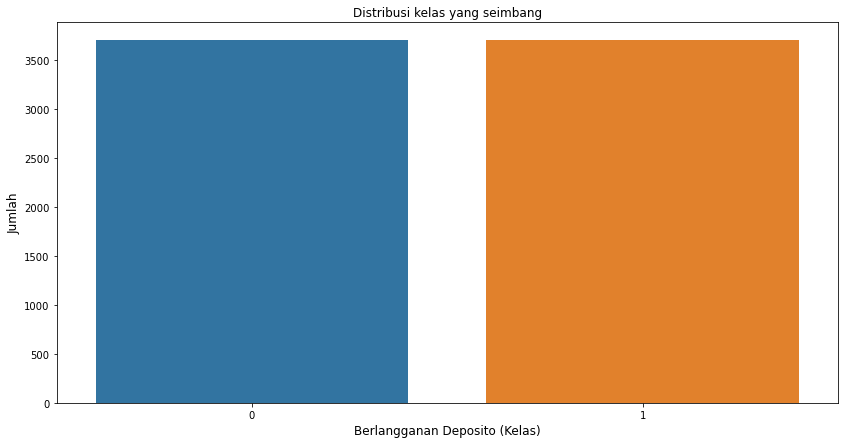

In [85]:
plt.figure(figsize=(14,7))
sns.countplot(x='berlangganan_deposito', data=bank_df_normal_distributed)
plt.title('Distribusi kelas yang seimbang', fontsize=12)
plt.xlabel('Berlangganan Deposito (Kelas)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

Data latih kita sudah memiliki proporsi kelas yang seimbang. Kini akan dilakukan training ulang pada model dan melihat evaluasinya dengan scoring **accuracy** karena subsample sudah disampling dengan seimbang

## Training model dengan kelas data latih yang sudah seimbang

### Model Training

In [86]:
cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=models,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    kfold=kfold,
    scoring=scoring_accuracy
)

### Lihat performa (akurasi) model yang sudah dilatih
***
Performa ini dilihat dari hasil k-fold cross-validation yang sudah dilakukan

In [87]:
# cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.8336032388663968  std accuracy = 0.008298223557162334
K-Nearest Neighbor: mean accuracy = 0.7821862348178138  std accuracy = 0.011470191287922149
Support Vector Machine: mean accuracy = 0.8666666666666666  std accuracy = 0.012395101218035111
Decision Tree: mean accuracy = 0.7840755735492577  std accuracy = 0.009152941947537468
Random Forest: mean accuracy = 0.853846153846154  std accuracy = 0.012206326665329023
Naive Bayes: mean accuracy = 0.7066126855600539  std accuracy = 0.01911571520607371


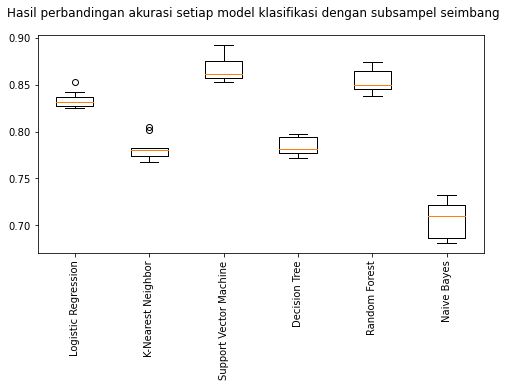

In [88]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi dengan subsampel seimbang')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

**ANALISIS** <br>
Model SVM tampil memberikan rata-rata akurasi tertinggi ketika model dilatih dengan data latih yang seimbang.

### Melihat hasil klasifikasi SVM yang sudah dilatih dengan data uji

In [89]:
# inisialisasi model
svm_balanced = SVC()

# fit model into training data
svm_balanced.fit(X_train_balanced,y_train_balanced)

# get y prediction
y_pred_balanced = svm_balanced.predict(X_test_pca)


In [90]:
# print score
print("Accuracy score SVM with balanced subsample = ", metrics.accuracy_score(y_test,y_pred_balanced)," %")

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_balanced))

# hasil klasifikasi
print(metrics.classification_report(y_test,y_pred_balanced))

Accuracy score SVM with balanced subsample =  0.8391599902889051  %
[[6067 1236]
 [  89  846]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7303
           1       0.41      0.90      0.56       935

    accuracy                           0.84      8238
   macro avg       0.70      0.87      0.73      8238
weighted avg       0.92      0.84      0.86      8238



**ANALISIS** <br>
Hasil *confusion matrix* pada model SVM yang dilatih dengan sample yang balanced menunjukkan adanya peningkatan nilai **recall** kelas '1'. <br>
1. Sebelum dilakukan *under-sampling* nilai recall untuk kelas '1' yaitu 0.44, sedangkan setelah di-*undersampling* menjadi 0.92 (**peningkatannya drastis**) <br>
2. Terjadi penurunan **recall** untuk kelas '0' setelah *undersampling* dari 0.93 menjadi 0.83. Penurunannya tidak sebesar pada kenaikan recall untuk kelas '1'
3. Model SVM ini juga memberikan nilai akurasi yang terbilang cukup baik sebesar 84,17% <br>

**Penting!!** <br>
Nilai-nilai yang dihasilkan mungkin bervariasi seiring kode program dijalankan dan komputer yang digunakan. Namun, saat dijalankan SVM muncul memberikan hasil seperti di atas

## Tuning hyperparameter dari model terbaik
***
SVM tampil dengan nilai rata-rata akurasi tertinggi serta memberikan hasil recall yang bagus. Selanjutnya hyperparameter dari SVM akan dilakukan tuning untuk bisa mendapatkan performa yang lebih optimal

In [91]:
# inisialisasi SVM model
svm_params_tuned = SVC()

# inisialisasi objek KFold dengan k=10
kfold = kfold

# inisialisasi daftar hyperparameter yang akan dituning
params_grid={
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma':['scale','auto'],
}

# instansiasi grid seach objek
grid_svm = GridSearchCV(
    estimator= svm_params_tuned,
    param_grid=params_grid,
    scoring=scoring_accuracy,
    cv = kfold
)

# fit grid objek ke data train
grid_results_ = grid_svm.fit(X_train_balanced,y_train_balanced)

In [92]:
# Cetak hyperparameter yang memberikan hasil terbaik
print('Best SVM Hyperparameter: {}'.format(grid_results_.best_params_))
print('Best SVM Accuracy Score: {}'.format(grid_results_.best_score_))

Best SVM Hyperparameter: {'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy Score: 0.8666666666666666


## Finalisasi Model

### Training model dengan hyperparameter optimal

In [93]:
# instansiasi objek SVM dengan hyperparameter optimal
svm_final = SVC(gamma=grid_results_.best_params_['gamma'],kernel=grid_results_.best_params_['kernel'])


# training
svm_final.fit(X_train_balanced,y_train_balanced)

# model evaluation using data testing
y_pred_final = svm_final.predict(X_test_pca)

### Cetak hasil model yang sudah dievaluasi

In [94]:
# print score
print("Accuracy score Final Model SVM = ", metrics.accuracy_score(y_test,y_pred_final)," %")

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_final))

# hasil klasifikasi
print(metrics.classification_report(y_test,y_pred_final))

Accuracy score Final Model SVM =  0.8391599902889051  %
[[6067 1236]
 [  89  846]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7303
           1       0.41      0.90      0.56       935

    accuracy                           0.84      8238
   macro avg       0.70      0.87      0.73      8238
weighted avg       0.92      0.84      0.86      8238



Model SVM Final memberikan **recall** untuk kedua kelas yang sangat baik. Pengaturan *hyperparameter* untuk SVM final adalah *kernel* **rbf** dan *gamma* **scale**. Selanjutnya model ini siap untuk masuk ke tahap *deployment*